In [2]:
import pandas as pd

df = pd.read_csv('wafa_clean.csv')

df.head()

Column                                          companies  \
0       0  Aarhus BSS - Aarhus University;Gejst Studio;No...   
1       1  FBG Medier A/S;DanModul A/S;Dansk AvisTryk A/S...   
2       2  MAD CAT productions;VIA Film &amp Transmedia I...   
3       3  Edlund A/S;Visma Enterprise Danmark;Formpipe S...   
4       4                                                NaN   

                          company  \
0  Aarhus BSS - Aarhus University   
1                  FBG Medier A/S   
2             MAD CAT productions   
3                      Edlund A/S   
4                             NaN   

                                             degrees  \
0  Bestyrelsesuddannelsen, Strategi;IAA, Diploma,...   
1  Diploma in: Marketing, International Marketing...   
2  Bachelor's degree;The Fashion Experience, Inte...   
3  MA, Mathematics and communication theories;Ora...   
4                                                NaN   

                                             follows  \
0  Lunar Way;Hello Monday;Erhverv Aarhus;Sensu A/...   
1  Danske Bank;Amazon;Gigaom;Nykredit;Jyllands-Po...   
2  Aarhus Business College;Social Selling Company...   
3  Danske Bank;FIH Erhvervsbank A/S;Tesla;ATP;Sit...   
4                                                NaN   

                                              groups  \
0  IAA Young Professional Members;Content Strateg...   
1  Adobe Digital Publishing Platform;BMW Group;Fo...   
2       Leder Forum;VIA Film &amp Transmedia Network   
3  Testing Back 2 Basics;Tecpoint;Women Who Test;...   
4                                                NaN   

                    industry                              industry(clean)  \
0  Marketing and Advertising  Advertising, marketing and public relations   
1  Marketing and Advertising  Advertising, marketing and public relations   
2           Media Production                             Media Production   
3          Computer Software                           Digital industries   
4  Marketing and Advertising  Advertising, marketing and public relations   

                                   location  \
0                   Central Region, Denmark   
1                   Central Region, Denmark   
2         Aarhus C, Central Region, Denmark   
3  Copenhagen Area, Capital Region, Denmark   
4                   Central Region, Denmark   

                                             schools  \
0  Aarhus BSS - Aarhus University;International A...   
1  Herning Business Schole and Århus Business Scholl   
2  VIA Multiplatform Storytelling &amp Production...   
3  Roskilde University;Danish Data Electronics;UN...   
4                                                NaN   

                                              skills  \
0  Advertising;Digital Strategy;Integrated Market...   
1  Advertising;Business Strategy;Management Consu...   
2  High-end Retouching;Portrait Photography;Graph...   
3  PL/SQL;Team Foundation Server (TFS);Analysis;D...   
4                                                NaN   

                                        Skills(clen)  \
0  Advertising;Digital Strategy;Integrated Market...   
1  Advertising;Business Strategy;Management Consu...   
2  High-end Retouching;Portrait Photography;Graph...   
3  PL/SQL;Team Foundation Server (TFS);Analysis;D...   
4                                                NaN   

                                             summary  \
0  Specialties: Digital strategy and business dev...   
1  Experienced Chief Executive Officer with a dem...   
2                                                NaN   
3  I have worked with software development and -t...   
4                                                NaN   

   term_not sadjfisdjfoi238r2yu83rwef98j289efusadf  terms        uid  \
0                                                0    NaN   15481914   
1                                                0    NaN  171841417   
2                                                0    NaN  365819408   
3 

In [3]:
import seaborn as sns

sns.set()

backscatter = ['#52d0a5', '#3c44ca', '#fe6e5d', 
               '#848aff', '#ffd663', '#7a726b', 
               '#f5bab4', '#c2b6b0', '#bcebd9', 
               '#9265ca', '#ffebb1', '#ffa265']

sns.set_palette(backscatter)

sns.palplot(sns.color_palette())

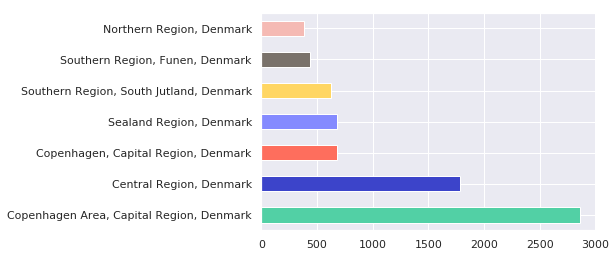

In [4]:
df['location'].value_counts()[:7].plot(kind='barh', color=backscatter)

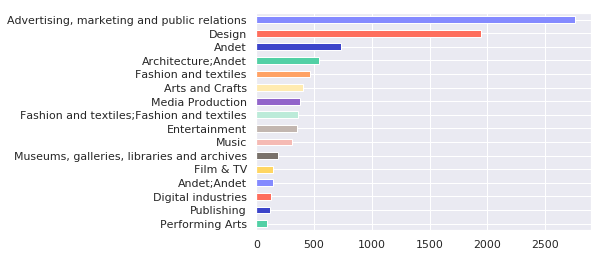

In [5]:
df['industry(clean)'].value_counts().sort_values(ascending=True)[2:].plot(kind='barh', color=backscatter)

In [6]:
industries = df['industry(clean)'].value_counts().sort_values(ascending=True)[2:]

#sns.catplot(x=ind_indexes, y=ind_values)

In [7]:
industries.index

Index(['Performing Arts', 'Publishing', 'Digital industries', 'Andet;Andet',
       'Film & TV', 'Museums, galleries, libraries and archives', 'Music',
       'Entertainment', 'Fashion and textiles;Fashion and textiles',
       'Media Production', 'Arts and Crafts', 'Fashion and textiles',
       'Architecture;Andet', 'Andet', 'Design',
       'Advertising, marketing and public relations'],
      dtype='object')

In [8]:
import pandas as pd
import folium

region_geo = 'output.json'
region_data = pd.read_csv('region_data.csv')

m = folium.Map(location=[56, 10], zoom_start=7, tiles='')

folium.Choropleth(
    geo_data=region_geo,
    name='choropleth',
    data=region_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Creative Industries'
).add_to(m)

m.save('creative_industries.html')

m

In [9]:
df['Skills(clen)'] = df['Skills(clen)'].apply(lambda x: x.split(';') if not pd.isnull(x) else "")

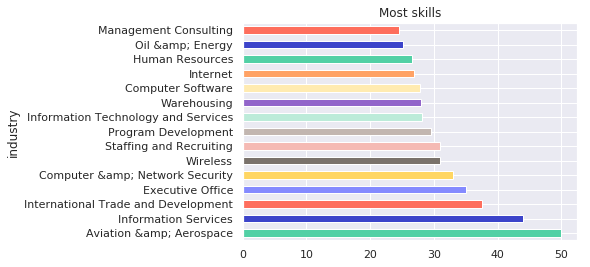

In [10]:
df['skill_count'] = df['Skills(clen)'].apply(lambda x: len(x))
df.groupby('industry').mean()['skill_count'].sort_values(ascending=False)[:15].plot(kind='barh', title='Most skills', color=backscatter)

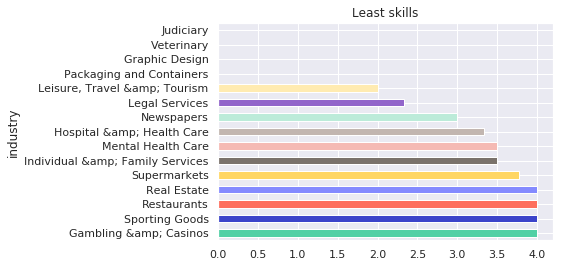

In [11]:
df.groupby('industry').mean()['skill_count'].sort_values(ascending=False)[-15:].plot(kind='barh', title='Least skills', color=backscatter)

In [12]:
import numpy as np
from langdetect import detect
from tqdm import tqdm

def lang_detect(string):
    try:
        lang = detect(string)
    except:
        lang = np.NaN
    return lang

tqdm.pandas(desc="find sprog")

df['summary_lang'] = df['summary'].progress_apply(lang_detect)

find sprog: 100%|██████████| 9253/9253 [00:58<00:00, 157.03it/s]


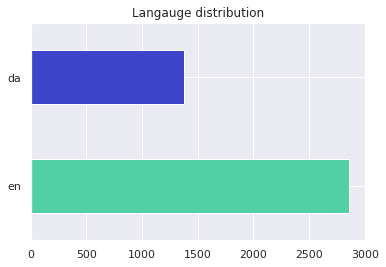

In [23]:
df['summary_lang'].value_counts()[:2].plot(kind='barh', color=backscatter, title='Langauge distribution')

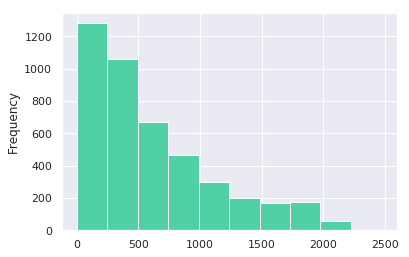

In [28]:
df['summary'].apply(lambda x: len(x) if not pd.isnull(x) else np.nan).plot(kind='hist')